In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.ticker as ticker
import pandas as pd
from pandas_ods_reader import read_ods
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
### Colunas dos outputs do modo e ordem que o LibRadtran escreve:
cols = ['comp', 'zout', 'albedo', 'T', 'T_sur', 'TCC', 'sza', 'edir', 'eup']

In [3]:
### Caminhos e listagem dos arquivos .out:
pasta_limpos = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_integrate_final-2015/limpo/'
pasta_poluidos = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_integrate_final-2015/poluido/'
pasta_trans1 = '/home/andre/libRadtran-2.0.4/codigos_doutorado/outs_integrate_final-2015/trans1/'

data_limpos = sorted(glob.glob(pasta_limpos+'import_????_limpa_??_??_2015.out'))
data_poluidos = sorted(glob.glob(pasta_poluidos+'import_????_poluida_??_??_2015.out'))
data_trans1 = sorted(glob.glob(pasta_trans1+'import_????_trans1_??_??_2015.out'))

In [4]:
### Lendo e armazenando os dias e o valor de irradiância integrado ao longo do espectro p/ o período limpo:
listasl = []
for file in data_limpos:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    lista = [string, data['sza'][0], data['eup'][0]]
    listasl.append(lista)
dic = {}
for l in listasl:
    dic.update({l[0]:l[1:]})
dfl = pd.DataFrame(dic)
dfl.index = ['sza', 'irrad']
dfl

,01/01/2015,02/01/2015,03/01/2015,04/01/2015,05/01/2015,06/01/2015,07/01/2015,08/01/2015,09/01/2015,10/01/2015,...,07/04/2015,08/04/2015,10/04/2015,11/04/2015,12/04/2015,13/04/2015,14/04/2015,15/04/2015,16/04/2015,17/04/2015
sza,19.8260,19.7480,19.6620,19.5700,19.4710,19.3650,19.252,19.1330,19.007,18.8740,...,10.1540,10.5190,11.2460,11.6080,11.9690,12.3280,12.685,13.0400,13.3920,13.7430
irrad,686.7074,703.0388,628.1716,701.6724,705.2604,700.5056,618.951,643.1976,714.959,664.5839,...,684.6832,612.3952,689.1305,646.2625,638.4913,695.2346,627.897,667.5718,699.7968,631.6789


In [5]:
### Lendo e armazenando os dias e o valor de irradiância integrado ao longo do espectro p/ o período poluído:
listasp = []
for file in data_poluidos:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    lista = [string, data['sza'][0], data['eup'][0]]
    listasp.append(lista)
dic = {}
for l in listasp:
    dic.update({l[0]:l[1:]})
dfp = pd.DataFrame(dic)
dfp.index = ['sza', 'irrad']
dfp

,25/09/2015,26/09/2015,27/09/2015,28/09/2015,29/09/2015,01/10/2015,02/10/2015,03/10/2015,04/10/2015,05/10/2015,...,21/11/2015,22/11/2015,23/11/2015,24/11/2015,25/11/2015,26/11/2015,27/11/2015,28/11/2015,29/11/2015,30/11/2015
sza,2.7420,2.4760,2.2490,2.0730,1.9630,1.9750,2.0950,2.2770,2.5060,2.7710,...,16.9680,17.1710,17.3680,17.5590,17.7440,17.9230,18.0950,18.2620,18.4210,18.575
irrad,772.1026,776.1433,757.4539,766.8399,710.2027,790.0077,764.6872,762.1589,779.1023,771.6597,...,730.2579,774.5686,774.0909,773.5497,735.8164,782.7811,741.5363,747.6758,757.9041,756.004


In [6]:
### Lendo e armazenando os dias e o valor de irradiância integrado ao longo do espectro p/ o período trans1:
listast1 = []
for file in data_trans1:
    data = pd.read_csv(file, skiprows=0, sep="\s+", names=cols, na_values=["-9999"])
    data.eup = data.eup/1000
    dia = file.split('/')[-1].split('_')[3]
    mes = file.split('/')[-1].split('_')[4]
    ano = file.split('/')[-1].split('_')[-1].split('.')[0]
    string = dia+'/'+mes+'/'+ano
    lista = [string, data['sza'][0], data['eup'][0]]
    listast1.append(lista)
dic = {}
for l in listast1:
    dic.update({l[0]:l[1:]})
dft1 = pd.DataFrame(dic)
dft1.index = ['sza', 'irrad']
# dft1

In [7]:
################## Fazendo o merge dos dataframes para 2015 (limpo+trans1+poluido):
merge0 = dfl.merge(dft1, left_index=True, right_index=True)
merge1 = merge0.merge(dfp, left_index=True, right_index=True)
merge1

,01/01/2015,02/01/2015,03/01/2015,04/01/2015,05/01/2015,06/01/2015,07/01/2015,08/01/2015,09/01/2015,10/01/2015,...,21/11/2015,22/11/2015,23/11/2015,24/11/2015,25/11/2015,26/11/2015,27/11/2015,28/11/2015,29/11/2015,30/11/2015
sza,19.8260,19.7480,19.6620,19.5700,19.4710,19.3650,19.252,19.1330,19.007,18.8740,...,16.9680,17.1710,17.3680,17.5590,17.7440,17.9230,18.0950,18.2620,18.4210,18.575
irrad,686.7074,703.0388,628.1716,701.6724,705.2604,700.5056,618.951,643.1976,714.959,664.5839,...,730.2579,774.5686,774.0909,773.5497,735.8164,782.7811,741.5363,747.6758,757.9041,756.004


In [8]:
days15 = pd.date_range(start="2015-01-01", end='2015-12-31',freq='D').strftime('%d/%m/%Y')
df_nans = pd.DataFrame(columns=days15, index=['sza', 'irrad'])
booleanos = [dia in list(merge1.columns) for dia in list(df_nans.columns)]
for i in range(len(booleanos)):
    if booleanos[i] == True:     # Há dados neste dia
        pass
    elif booleanos[i] == False:  # Não há dados neste dia
        merge1.insert(i, column=df_nans.columns[i], value=df_nans.T.iloc[i].values)
        
merge1

,01/01/2015,02/01/2015,03/01/2015,04/01/2015,05/01/2015,06/01/2015,07/01/2015,08/01/2015,09/01/2015,10/01/2015,...,22/12/2015,23/12/2015,24/12/2015,25/12/2015,26/12/2015,27/12/2015,28/12/2015,29/12/2015,30/12/2015,31/12/2015
sza,19.8260,19.7480,19.6620,19.5700,19.4710,19.3650,19.252,19.1330,19.007,18.8740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irrad,686.7074,703.0388,628.1716,701.6724,705.2604,700.5056,618.951,643.1976,714.959,664.5839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
path = '/mnt/HD_500GB_WD/historia2/ZZ-TabelasNOAA/2015/'

arqs = sorted(glob.glob(path+'NOAA_???.ods'))
tabelas14 = []
for i in range(len(arqs)):
#     print(arqs[i])
    df = read_ods(arqs[i], 1, headers=True)
    tabn = df[['Date', 'Sun Rad Vector (AUs)', 'Solar Noon (LST)', 'Solar Zenith Angle (deg)']]
    tabelas14.append(tabn)
    
szas12LTnoaa, d12LT = [], []
for t in tabelas14:
    szas12LTnoaa.append(t.iloc[119][3])
    d12LT.append(t.iloc[119][1])

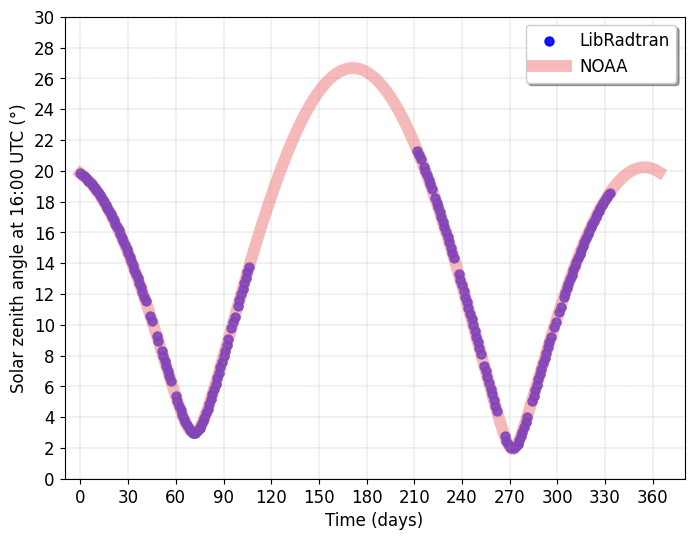

In [10]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
tf = 12
cores = ['blue', 'lightcoral']
limitesx = [-10, 380]
limitesy = [0.0, 30.0]
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=tf, color='black')
# ax.set_title("Clouds with LWC $ϵ$ [0.2;0.4]g/m³ at T3 site", fontsize=tf)
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel('Solar zenith angle at 16:00 UTC (°)', fontsize=tf)
ax.grid(axis='both', linestyle='--', linewidth=0.22, color='grey')
ax.set(xlim=limitesx, ylim=limitesy, facecolor='white')
# ax.set(xlim=limitesx, facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

ax.scatter(np.arange(len(merge1.columns)), merge1.loc['sza'], color=cores[0],
        label='LibRadtran', alpha=0.9, linewidth=1.5)
ax.plot(np.arange(len(merge1.columns)), szas12LTnoaa, color=cores[1],
        label='NOAA', alpha=0.55, linewidth=8.5)
ax.legend(loc='best', frameon=True, fontsize=tf, ncol=1, fancybox=True, shadow=True)

# ### Desenhando linhas verticais delimitando os meses do ano:
# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[1], linewidth=0.50)

In [11]:
d2s, razoes, reflets = [], [], []
for i in range(len(merge1.loc['irrad'])):
    E = merge1.loc['irrad'][i]
    sza = merge1.loc['sza'][i]*(np.pi/180)
    mu0 = np.cos(sza)
    d2 = d12LT[i]**2 
    reflet = (E*d2)/mu0
    d2s.append(d2)
    razoes.append(mu0/d2)
    reflets.append(reflet)

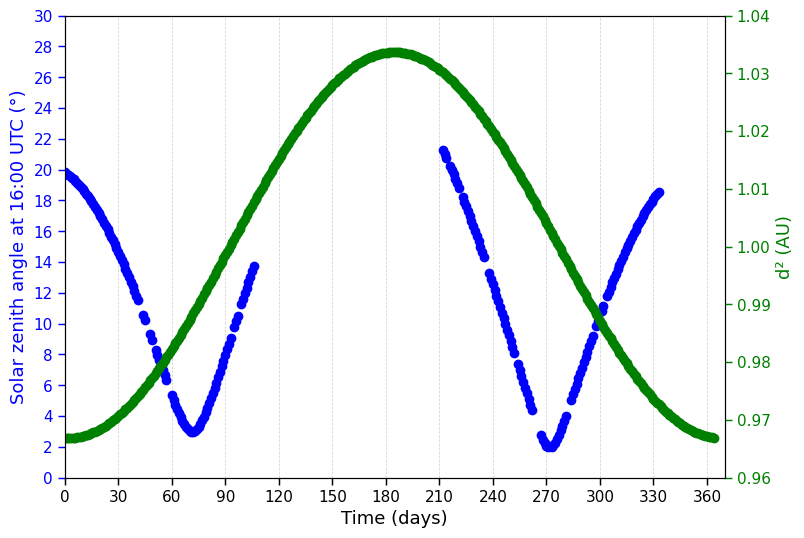

In [12]:
########################################## Configs:
cores = ['midnightblue', 'r', 'mediumseagreen', 'saddlebrown']
limitesx = [0, 370]
limitesy = [0.0, 30.0]
# limitesyrazoes = [0.90, 1.01]
limitesyd2s = [0.96, 1.04]
tf = 13

########################################## Elimina e acerta posições dos axes:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
fig, host = plt.subplots(figsize=(8,6), facecolor='white')
fig.subplots_adjust(right=0.95)
par1 = host.twinx()

########################################## Setting dos limites, das legendas e plotting de cada variável:
p1, = host.plot(np.arange(len(merge1.columns)), merge1.loc['sza'], 'bo', label="SZA")
p2, = par1.plot(np.arange(len(merge1.columns)), d2s, 'go', label="Earth-Sun distance in UA")
host.set_xlim(limitesx)
host.set_ylim(limitesy)
par1.set_ylim(limitesyd2s)
# host.set_title(u"Clouds with LWC $ϵ$ [0.2;0.4]g/m³ at T3 site", fontsize=tf)
host.set_xlabel('Time (days)', fontsize=tf)
host.set_ylabel('Solar zenith angle at 16:00 UTC (°)', fontsize=tf)
par1.set_ylabel('d² (AU)', fontsize=tf)
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
tkw = dict(size=5, width=1.05)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)

host.xaxis.set_major_locator(ticker.MultipleLocator(30))
host.yaxis.set_major_locator(ticker.MultipleLocator(2))
par1.yaxis.set_major_locator(ticker.MultipleLocator(0.01))

lines = [p1, p2]
# host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='upper left', ncol=1, fancybox=True,
#             shadow=True, facecolor='white', edgecolor='black')
# host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)
host.grid(visible=True, which='both', axis='x', color='lightgrey', linestyle='--', linewidth=0.55)

# ### Desenhando linhas verticais delimitando os meses do ano:
# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[3], linewidth=0.45)

plt.show()

In [14]:
transposto = merge1.T

### Inserindo a coluna "irrad_corrigido" no dataframe "transposto":
transposto['irrad_corrigido'] = reflets

### Construindo um dataframe sem filtrar/excluir os picos (valores menores que 600 W/m²) nas irradiâncias:
df_sem_filtro = transposto.T

# ### Convertendo o "df_sem_filtro" para ".pkl" (tipo pikcle) e exportando ele na pasta "historia2":
# directory = '/mnt/HD_500GB_WD/historia2/'
# df_sem_filtro.to_pickle(directory+'irradiancias_corrigidas_diarias_model4_2015.pkl')

In [15]:
### Verificando em quais dias os valores de "reflets" são menores que 650 W/m²:
import math
for i, col in enumerate(merge1.columns):
    if (reflets[i] >= 600.0) or (math.isnan(reflets[i])):
        print('{0} -> Ok...'.format(col))
    elif (reflets[i] < 600.0):
        print('{0}: {1} -> Excluir!!!!'.format(col, reflets[i]))

01/01/2015 -> Ok...
02/01/2015 -> Ok...
03/01/2015 -> Ok...
04/01/2015 -> Ok...
05/01/2015 -> Ok...
06/01/2015 -> Ok...
07/01/2015 -> Ok...
08/01/2015 -> Ok...
09/01/2015 -> Ok...
10/01/2015 -> Ok...
11/01/2015 -> Ok...
12/01/2015 -> Ok...
13/01/2015 -> Ok...
14/01/2015 -> Ok...
15/01/2015 -> Ok...
16/01/2015 -> Ok...
17/01/2015 -> Ok...
18/01/2015 -> Ok...
19/01/2015 -> Ok...
20/01/2015 -> Ok...
21/01/2015 -> Ok...
22/01/2015 -> Ok...
23/01/2015 -> Ok...
24/01/2015 -> Ok...
25/01/2015 -> Ok...
26/01/2015 -> Ok...
27/01/2015 -> Ok...
28/01/2015 -> Ok...
29/01/2015 -> Ok...
30/01/2015 -> Ok...
31/01/2015 -> Ok...
01/02/2015 -> Ok...
02/02/2015 -> Ok...
03/02/2015 -> Ok...
04/02/2015 -> Ok...
05/02/2015 -> Ok...
06/02/2015 -> Ok...
07/02/2015: 438.2664820522113 -> Excluir!!!!
08/02/2015: 571.6526671959916 -> Excluir!!!!
09/02/2015 -> Ok...
10/02/2015 -> Ok...
11/02/2015 -> Ok...
12/02/2015 -> Ok...
13/02/2015 -> Ok...
14/02/2015 -> Ok...
15/02/2015 -> Ok...
16/02/2015 -> Ok...
17/02/2015

In [16]:
### Dias + limpos (referência para cálculo das forçantes) - Modelo 1 (visual):
display(transposto[155:160])

### Dias + limpos (vem do "Descobrindo_dias_pluma_clusters.ipynb") - Modelo 2 (clusterização):
dias_fundo = ['25/02/2015', '03/05/2015', '04/05/2015']
dias_fundo_n = [55, 122, 123]
display(transposto.iloc[dias_fundo_n])

,sza,irrad,irrad_corrigido
05/06/2015,NaN,NaN,NaN
06/06/2015,NaN,NaN,NaN
07/06/2015,NaN,NaN,NaN
08/06/2015,NaN,NaN,NaN
09/06/2015,NaN,NaN,NaN


,sza,irrad,irrad_corrigido
25/02/2015,6.979,714.1355,704.99959
03/05/2015,NaN,NaN,NaN
04/05/2015,NaN,NaN,NaN


In [17]:
### Substituindo os valores de "reflets" (ou "irrad_corrigido") menores que 600 W/m² por NaN no "transposto":
transposto.loc[transposto['irrad_corrigido']<600.0, 'irrad_corrigido'] = np.nan
df = transposto.T
df

,01/01/2015,02/01/2015,03/01/2015,04/01/2015,05/01/2015,06/01/2015,07/01/2015,08/01/2015,09/01/2015,10/01/2015,...,22/12/2015,23/12/2015,24/12/2015,25/12/2015,26/12/2015,27/12/2015,28/12/2015,29/12/2015,30/12/2015,31/12/2015
sza,19.826,19.748,19.662,19.57,19.471,19.365,19.252,19.133,19.007,18.874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irrad,686.7074,703.0388,628.1716,701.6724,705.2604,700.5056,618.951,643.1976,714.959,664.5839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irrad_corrigido,705.814086,722.23304,644.970086,720.026255,723.274436,717.946735,633.944916,658.331947,731.265743,679.244578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
### Convertendo o "df" para ".pkl" (tipo pikcle) e exportando ele na pasta "historia2":
directory = '/mnt/HD_500GB_WD/historia2/'
df.to_pickle(directory+'irradiancias_corrigidas_diarias_model4_2015_comfiltro_final.pkl')